In [1]:
%matplotlib inline
# globals
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
#set_fonts(mpl, 'paper')
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

In [2]:
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ["#CC79A7", "#E69F00", "#D55E00",
               "#0072B2", "#56B4E9", "#009E73"])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

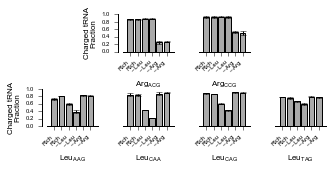

In [22]:
csvfiles = filter(lambda x: x.endswith('csv'), os.listdir('../processeddata/'))

fig = plt.figure()

axcount = 1
for File in sorted(csvfiles):
    data = pd.read_csv('../processeddata/' + File)
    data = data.rename(columns={'sterr':'stderr'})
    data = data[data['cell_line'].apply(lambda x: x.find('RagB-WT') == -1)]
    data = data.sort_values(by=['samplelabel','cell_line'], ascending = False)
    trna = File.split('_')[0]
    aa = trna[:3].capitalize()
    anticodon = trna[3:].upper()
    if anticodon in ['TCG','TAA','TRNAS']:
        continue
    axcount += 1
    if axcount == 4:
        axcount += 1
    ax = fig.add_subplot(2,4,axcount)
    #mpl.rcParams['savefig.dpi'] = 144

    xlocations = range(len(data))
    ax.bar(xlocations, data['mean_chargedfraction'], align='center', color = 'darkgrey' )
    ax.errorbar(xlocations, data['mean_chargedfraction'], 
                data['stderr'], linestyle='None', color = 'black' )

    spineOffset = {'left': 5, 'bottom': 0}    
    [ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
         else spine.set_color('none') for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    ax.yaxis.set( major_locator = MaxNLocator(5) )

    ax.set_xlabel(aa + '$_{' + anticodon + '}$')
    ax.set_xticks(xlocations)
    ax.set_xticklabels(data['samplelabel'].apply(lambda x: x.split(' ')[0].replace('-',u'– ')), rotation=45, ha='right')
    ax.set_ylim(0,1)
    if axcount in [2,5]:
        ax.set_ylabel( 'Charged tRNA\nFraction')
    else:
        [ spine.set_color('none') for loc, spine in ax.spines.items() if loc in ['left'] ]
        ax.yaxis.set( ticks = [])
    ax.xaxis.set( ticks_position = 'bottom')
    
fig.set_size_inches([5,2])
fig.subplots_adjust(wspace = 0.5, hspace = 1)
fig.savefig('../figures/ragq99l_alltrnas.svg')

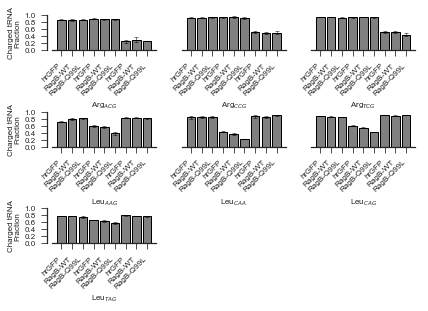

In [19]:
csvfiles = filter(lambda x: x.endswith('csv'), os.listdir('../processeddata/'))

fig = plt.figure()

axcount = 0
for File in sorted(csvfiles):
    
    data = pd.read_csv('../processeddata/' + File)
    trna = File.split('_')[0]
    aa = trna[:3].capitalize()
    anticodon = trna[3:].upper()
    if anticodon in ['TAA','TRNAS']:
        continue
    axcount += 1
    #if axcount == 4:
        #axcount +=1
    ax = fig.add_subplot(3,3,axcount)
    #mpl.rcParams['savefig.dpi'] = 144

    sampleOrder = np.array([0,1,2,3,4,5,6,7,8])

    xlocations = np.array([0,1,2,3,4,5,6,7,8])

    ax.bar(xlocations, data['mean_chargedfraction'][sampleOrder], align='center', facecolor = 'grey',edgecolor='black',linewidth=1 )
    ax.errorbar(xlocations, data['mean_chargedfraction'][sampleOrder], 
                data['sterr'][sampleOrder], linestyle='None', color = 'black', elinewidth=0.5, capsize=2, capthick=0.5 )

    spineOffset = {'left': 5, 'bottom': 0}    
    [ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
         else spine.set_color('none') for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    ax.yaxis.set( major_locator = MaxNLocator(5) )

    ax.set_xlabel(aa + '$_{' + anticodon + '}$')
    ax.set_xticks(xlocations)
    xticklabels=data['cell_line'][sampleOrder].replace('Flag-RagB-WT', 'RagB-WT').replace('Flag-RagB-Q99L','RagB-Q99L')
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')
    ax.set_ylim(0,1)
    if axcount in [1,4,7]:
        ax.set_ylabel( 'Charged tRNA\nFraction')
    else:
        [ spine.set_color('none') for loc, spine in ax.spines.items() if loc in ['left'] ]
        ax.yaxis.set( ticks = [])
    ax.xaxis.set( ticks_position = 'bottom')
#sns.despine()    
fig.set_size_inches([6.5,4.2])
fig.subplots_adjust(wspace = 0.25, hspace = 1.75)
fig.savefig('../figures/crisprh6_alltrnas_forpaper_v2.svg')
fig.savefig('../figures/crisprh6_alltrnas_forpaper_v2.pdf',bbox_inches='tight',pad_inches=0.1)



In [4]:
csvfiles

['argacg_crisprragblines_summary.csv',
 'argccg_crisprragblines_summary.csv',
 'argtcg_crisprragblines_summary.csv',
 'argtrnas_crisprragblines_summary.csv',
 'leuaag_crisprragblines_summary.csv',
 'leucaa_crisprragblines_summary.csv',
 'leucag_crisprragblines_summary.csv',
 'leutag_crisprragblines_summary.csv',
 'leutrnas_crisprragblines_summary.csv']